In [125]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn import tree
import pydotplus

In [126]:
my_data = pd.read_csv("fraud_oracle 3.csv", delimiter=",")
my_data[0:5]

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [98]:
X = my_data[['AccidentArea', 'Sex', 'VehiclePrice', 'MaritalStatus', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'VehicleCategory', 'Fault', 'NumberOfCars', 'Year', 'BasePolicy']].values

In [127]:
print("Unique values in 'Sex':", my_data['Sex'].unique())
print("Unique values in 'MaritalStatus':", my_data['MaritalStatus'].unique())
print("Unique values in 'AgeOfVehicle':", my_data['AgeOfVehicle'].unique())
print("Unique values in 'AgeOfPolicyHolder':", my_data['AgeOfPolicyHolder'].unique())
print("Unique values in 'VehicleCategory':", my_data['VehicleCategory'].unique())
print("Unique values in 'Fault':", my_data['Fault'].unique())
print("Unique values in 'NumberOfCars':", my_data['NumberOfCars'].unique())
print("Unique values in 'Year':", my_data['Year'].unique())
print("Unique values in 'BasePolicy':", my_data['BasePolicy'].unique())

Unique values in 'Sex': ['Female' 'Male']
Unique values in 'MaritalStatus': ['Single' 'Married' 'Widow' 'Divorced']
Unique values in 'AgeOfVehicle': ['3 years' '6 years' '7 years' 'more than 7' '5 years' 'new' '4 years'
 '2 years']
Unique values in 'AgeOfPolicyHolder': ['26 to 30' '31 to 35' '41 to 50' '51 to 65' '21 to 25' '36 to 40'
 '16 to 17' 'over 65' '18 to 20']
Unique values in 'VehicleCategory': ['Sport' 'Utility' 'Sedan']
Unique values in 'Fault': ['Policy Holder' 'Third Party']
Unique values in 'NumberOfCars': ['3 to 4' '1 vehicle' '2 vehicles' '5 to 8' 'more than 8']
Unique values in 'Year': [1994 1995 1996]
Unique values in 'BasePolicy': ['Liability' 'Collision' 'All Perils']


In [128]:
le_dict =  {}

for i in range(X.shape[1]):
    if X[:, i].dtype == object:  # Check if the column contains strings
        le = preprocessing.LabelEncoder()
        le.fit(X[:, i])
        X[:, i] = le.transform(X[:, i])
        le_dict[i] = le

In [129]:
# Encoding sex
le_Sex = preprocessing.LabelEncoder()
# Check unique values and adjust fitting accordingly
print(np.unique(X[:, 1])) # Check unique values in 'Sex' column
le_Sex.fit(np.unique(X[:, 1])) # Fit to the unique values in the column
X[:, 1] = le_Sex.transform(X[:, 1])

# Encoding marital status
le_MaritalStatus = preprocessing.LabelEncoder()
# Fit on unique values from the transformed array X, not the original DataFrame
le_MaritalStatus.fit(np.unique(X[:, 3]))
X[:, 3] = le_MaritalStatus.transform(X[:, 3])

# Encoding age of vehicle
le_AgeOfVehicle = preprocessing.LabelEncoder()
# Fit on unique values from the array X to ensure consistency
le_AgeOfVehicle.fit(np.unique(X[:, 4]))
X[:, 4] = le_AgeOfVehicle.transform(X[:, 4])

# Encoding age of policy holder
le_AgeOfPolicyHolder = preprocessing.LabelEncoder()
# Fit on unique values from the array X
le_AgeOfPolicyHolder.fit(np.unique(X[:, 5]))
X[:, 5] = le_AgeOfPolicyHolder.transform(X[:, 5])

# Encoding vehicle category
le_VehicleCategory = preprocessing.LabelEncoder()
# Fit on unique values from the array X
le_VehicleCategory.fit(np.unique(X[:, 6]))
X[:, 6] = le_VehicleCategory.transform(X[:, 6])

# Encoding fault
le_Fault = preprocessing.LabelEncoder()
#Fit on the unique values in the column from X to be consistent
le_Fault.fit(np.unique(X[:, 7]))
X[:, 7] = le_Fault.transform(X[:, 7]) # Change index to 10 to encode the 'Fault' column

# Encoding number of cars
le_NumberOfCars = preprocessing.LabelEncoder()
#Fit the encoder on the unique values in the column from X
le_NumberOfCars.fit(np.unique(X[:, 8])) # Change index to 11 to match 'NumberOfCars' column
X[:, 8] = le_NumberOfCars.transform(X[:, 8])

# Encoding year
le_Year = preprocessing.LabelEncoder()
#Fit the encoder on the unique values in the column from X
le_Year.fit(np.unique(X[:, 9])) # Change index to 12 to match 'Year' column
X[:, 9] = le_Year.transform(X[:, 9])

# Encoding base policy
le_BasePolicy = preprocessing.LabelEncoder()
#Fit the encoder on the unique values in the column from X
le_BasePolicy.fit(np.unique(X[:, 10])) # Change index to 11 to reflect the actual last column
X[:, 10] = le_BasePolicy.transform(X[:, 10]) # Change index to 11


# Display the first few rows of the transformed data
print(X[:5])


[0 1]
[[1 0 5 2 1 3 1 0 2 0 2]
 [1 1 5 2 4 4 1 0 0 0 1]
 [1 1 5 1 5 6 1 0 0 0 1]
 [0 1 0 1 6 7 1 1 0 0 2]
 [1 0 5 2 3 4 1 1 0 0 1]]


In [130]:
Y = my_data["FraudFound_P"].values
Y[0:5]

array([0, 0, 0, 0, 0])

In [131]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, Y_trainset, Y_testset = train_test_split(X, Y, test_size=0.3, random_state=3)

In [132]:
faultTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
faultTree.fit(X_trainset, Y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [133]:
predTree = faultTree.predict(X_testset)

In [134]:
predTree

array([0, 0, 0, ..., 0, 0, 0])

In [135]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(Y_testset, predTree))

DecisionTrees's Accuracy:  0.9424989191526156


In [136]:
from io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline


In [137]:
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

/bin/bash: line 1: conda: command not found
/bin/bash: line 1: conda: command not found


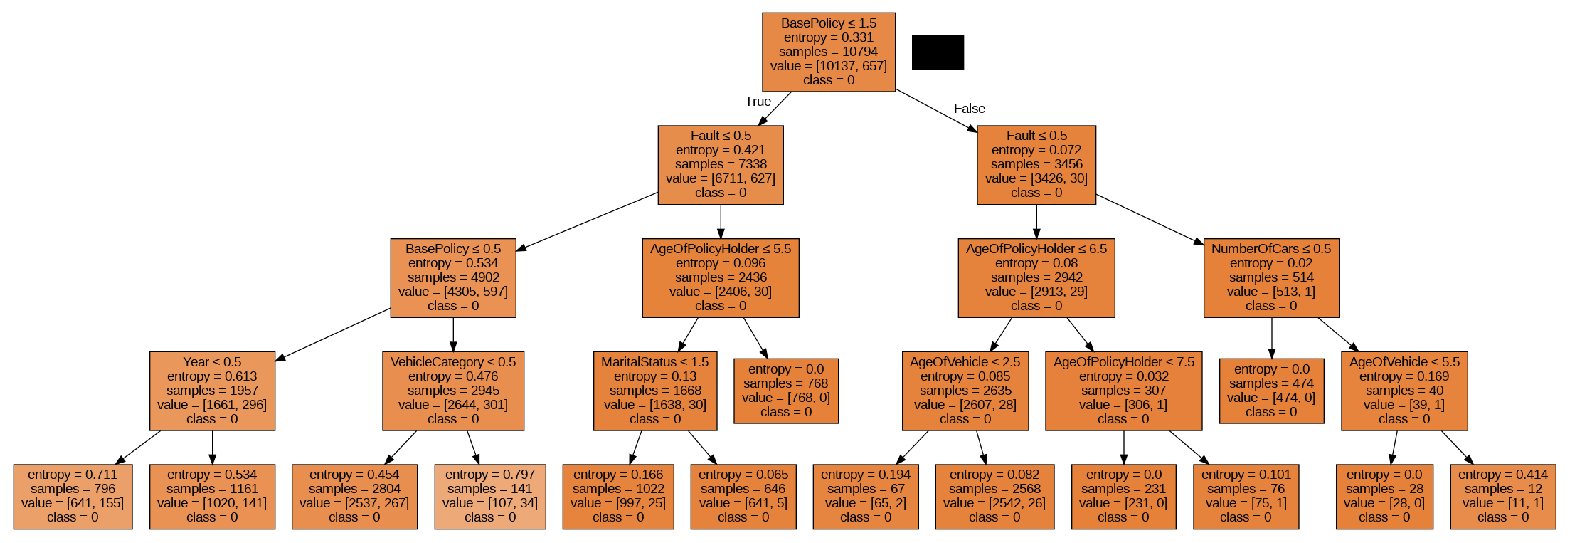

In [139]:
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn import tree
import pydotplus


# Create StringIO object
dot_data = StringIO()
filename = "faultTree.png"

# Define feature columns directly here
feature_columns = ['AccidentArea', 'Sex', 'VehiclePrice', 'MaritalStatus', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'VehicleCategory', 'Fault', 'NumberOfCars', 'Year', 'BasePolicy']

# Export the tree to dot format
out = tree.export_graphviz(faultTree,
                           feature_names=feature_columns,
                           out_file=dot_data,
                           class_names=[str(c) for c in np.unique(Y_trainset)],
                           filled=True,
                           special_characters=True,
                           rotate=False)

# Generate graph
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)

# Display the image
img = mpimg.imread(filename)
plt.figure(figsize=(20, 10))  # Adjust the size as needed
plt.imshow(img, interpolation='nearest')
plt.axis('off')
plt.show()